# Weight Loss Methods: What's Discussed the Most?

In [43]:
import pandas as pd
from pymongo import MongoClient

# Try connecting to MongoDB
try:
    client = MongoClient("mongodb://localhost:27017/", serverSelectionTimeoutMS=5000)  # 5-second timeout
    db = client["reddit_fitness"]  # Select database
    collection = db["posts"]  # Select collection
    
    # Try running a simple command to check the connection
    client.admin.command('ping')
    
    print("✅ Connected to MongoDB!")

    # Fetch data from MongoDB
    data = list(collection.find({}, {"_id": 0}))  # Exclude MongoDB's ObjectId

    if not data:
        raise Exception("MongoDB is empty. Falling back to CSV.")

    df = pd.DataFrame(data)

except Exception as e:
    print(f"⚠️ MongoDB Connection Failed: {e}")
    print("➡️ Switching to CSV data instead...")

    # Load data from CSV instead
    csv_file = "transformed_reddit_fitness_data.csv"
    
    try:
        df = pd.read_csv(csv_file)
        print(f"✅ Loaded data from {csv_file}")
    except FileNotFoundError:
        print(f"❌ ERROR: CSV file '{csv_file}' not found. Cannot proceed.")
        df = None  # Set df to None to indicate failure


✅ Connected to MongoDB!


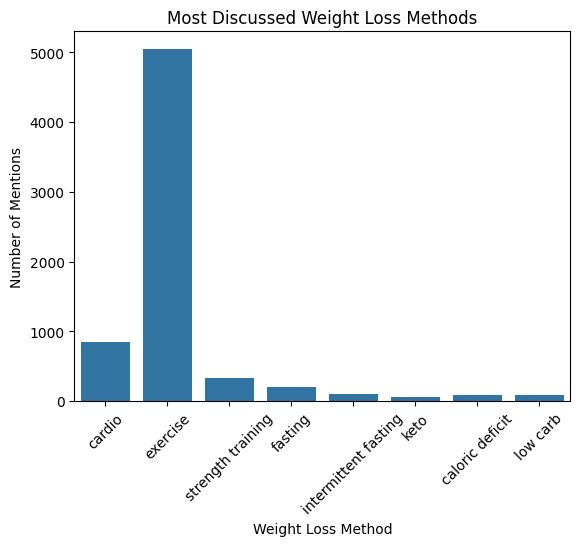

In [3]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Define weight loss methods
weight_loss_methods = ["caloric deficit", "fasting", "keto", "low carb", "cardio", "exercise", "strength training", "intermittent fasting"]

# Fetch all fitness-related posts from MongoDB
posts = collection.find({}, {"Clean_Text": 1})  # Fetch only 'Clean_Text'

# Count occurrences
method_counts = Counter()
for post in posts:
    for method in weight_loss_methods:
        if method in post["Clean_Text"].lower():
            method_counts[method] += 1

# Visualize
sns.barplot(x=list(method_counts.keys()), y=list(method_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Weight Loss Method")
plt.ylabel("Number of Mentions")
plt.title("Most Discussed Weight Loss Methods")
plt.show()


# How Do Users Track Their Progress? (Apps, calorie counting, body measurements)

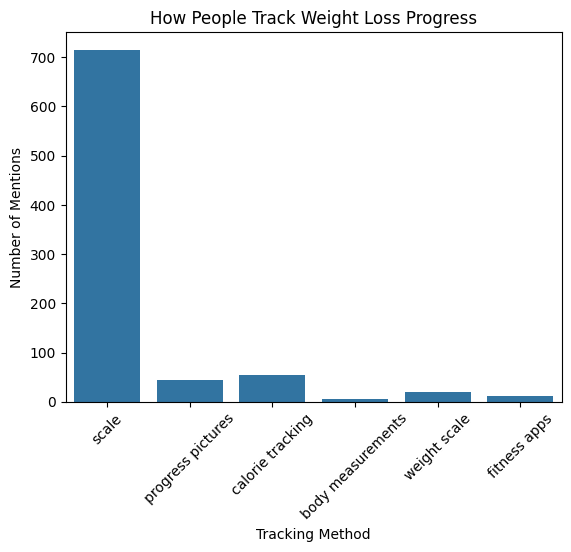

In [4]:
tracking_methods = ["calorie tracking", "scale", "progress pictures", "fitness apps", "body measurements", "weight scale"]

method_counts = Counter()
posts = collection.find({}, {"Clean_Text": 1})

for post in posts:
    for method in tracking_methods:
        if method in post["Clean_Text"].lower():
            method_counts[method] += 1

# Visualization
sns.barplot(x=list(method_counts.keys()), y=list(method_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Tracking Method")
plt.ylabel("Number of Mentions")
plt.title("How People Track Weight Loss Progress")
plt.show()


# Biggest Struggles in Weight Loss (Plateauing, motivation, binge eating)

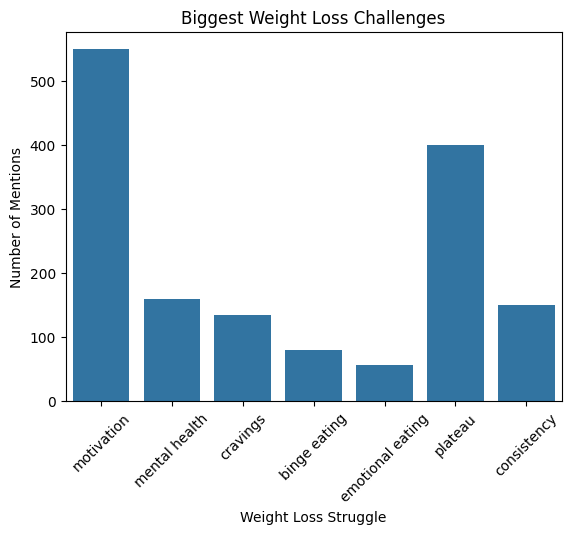

In [5]:
struggles = ["plateau", "motivation", "binge eating", "cravings", "emotional eating", "consistency", "mental health"]

struggle_counts = Counter()
posts = collection.find({}, {"Clean_Text": 1})

for post in posts:
    for struggle in struggles:
        if struggle in post["Clean_Text"].lower():
            struggle_counts[struggle] += 1

sns.barplot(x=list(struggle_counts.keys()), y=list(struggle_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Weight Loss Struggle")
plt.ylabel("Number of Mentions")
plt.title("Biggest Weight Loss Challenges")
plt.show()


# How Do Men vs. Women Discuss Weight Loss Differently?

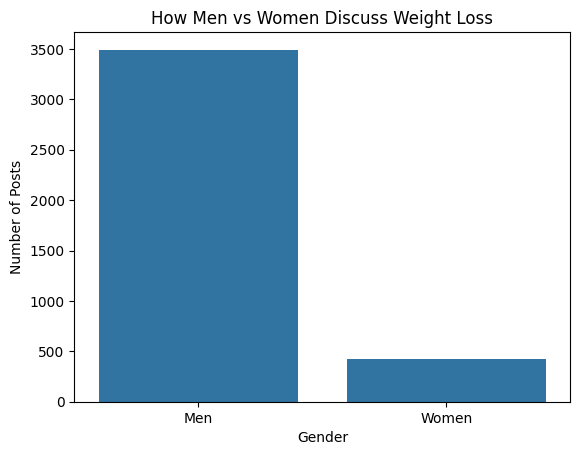

In [6]:
men_keywords = ["25M", "30M", "man", "male"]
women_keywords = ["25F", "30F", "woman", "female"]

male_posts = collection.find({"Clean_Text": {"$regex": "|".join(men_keywords), "$options": "i"}})
female_posts = collection.find({"Clean_Text": {"$regex": "|".join(women_keywords), "$options": "i"}})

male_count = sum(1 for _ in male_posts)
female_count = sum(1 for _ in female_posts)

sns.barplot(x=["Men", "Women"], y=[male_count, female_count])
plt.xlabel("Gender")
plt.ylabel("Number of Posts")
plt.title("How Men vs Women Discuss Weight Loss")
plt.show()


# Most Recommended Workout Routines

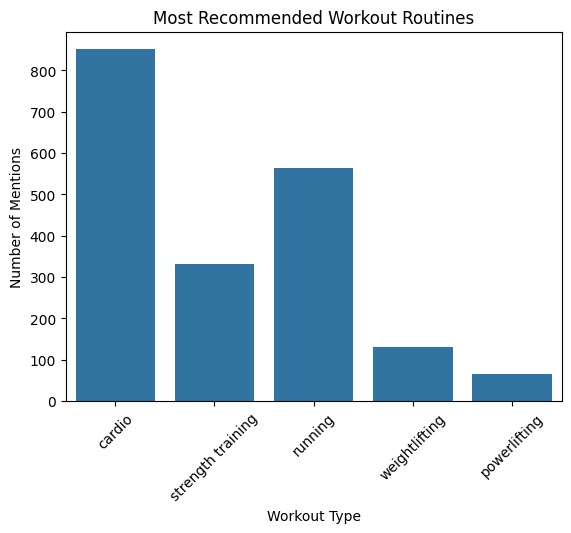

In [7]:
workout_routines = ["strength training", "HIIT", "CrossFit", "running", "cardio", "weightlifting", "powerlifting"]

workout_counts = Counter()
posts = collection.find({}, {"Clean_Text": 1})

for post in posts:
    for routine in workout_routines:
        if routine in post["Clean_Text"].lower():
            workout_counts[routine] += 1

sns.barplot(x=list(workout_counts.keys()), y=list(workout_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Workout Type")
plt.ylabel("Number of Mentions")
plt.title("Most Recommended Workout Routines")
plt.show()


# Most Mentioned Fitness Influencers & Programs

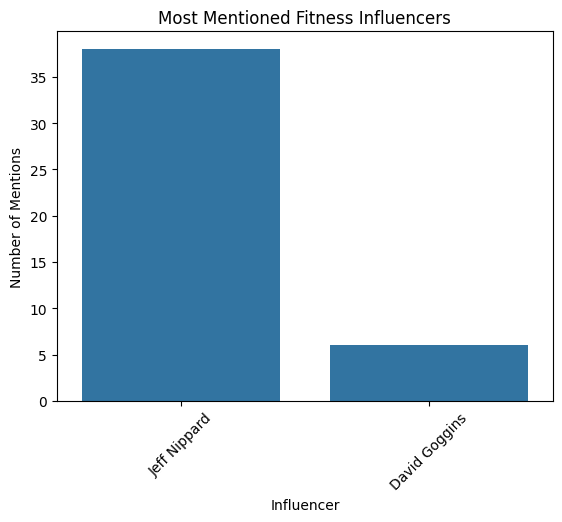

In [8]:
influencers = ["Chloe Ting", "Jeff Nippard", "Athlean-X", "Greg Doucette", "Joe Rogan", "David Goggins"]

influencer_counts = Counter()
posts = collection.find({}, {"Clean_Text": 1})

for post in posts:
    for influencer in influencers:
        if influencer.lower() in post["Clean_Text"].lower():
            influencer_counts[influencer] += 1

sns.barplot(x=list(influencer_counts.keys()), y=list(influencer_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Influencer")
plt.ylabel("Number of Mentions")
plt.title("Most Mentioned Fitness Influencers")
plt.show()


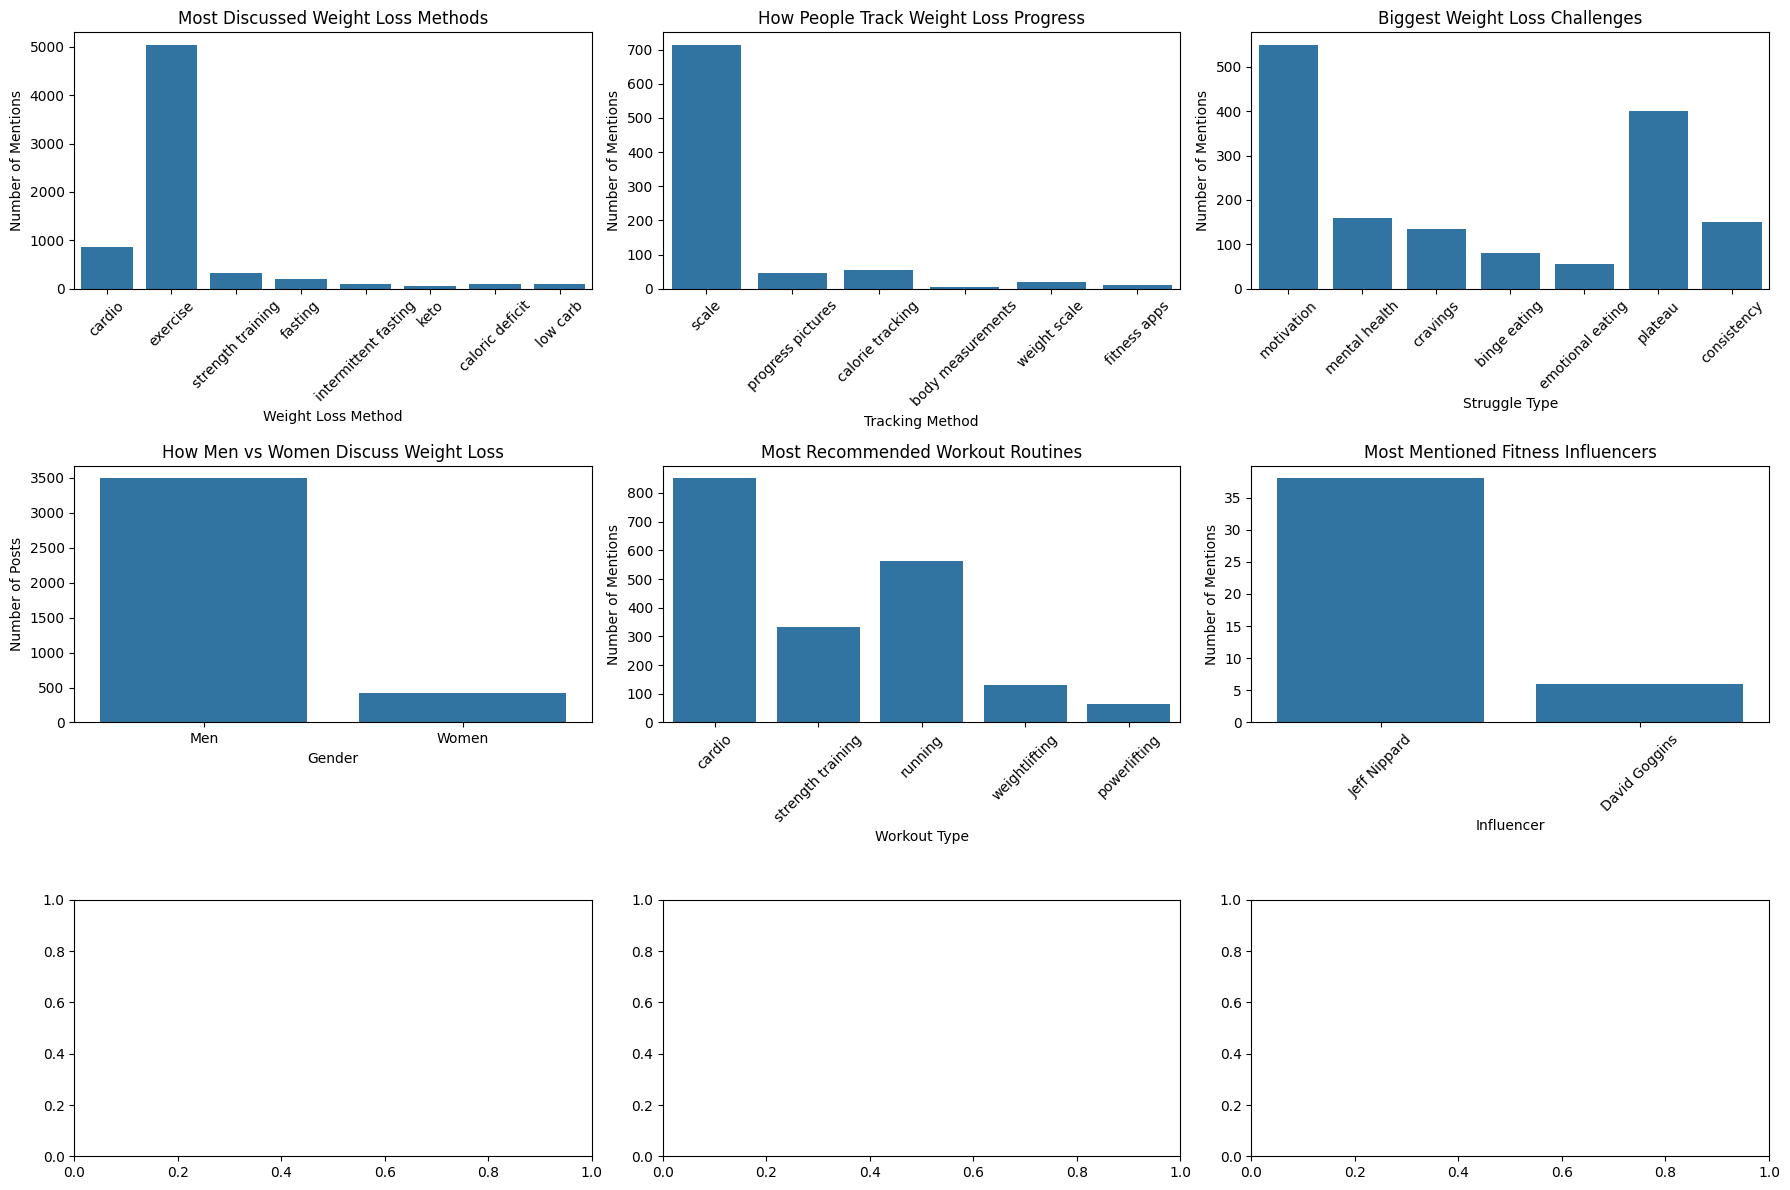

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create a grid layout for visualizing multiple analyses
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# ---------------------- 1. Most Discussed Weight Loss Methods ----------------------
weight_loss_methods = ["caloric deficit", "fasting", "keto", "low carb", "cardio", "exercise", "strength training", "intermittent fasting"]
method_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for method in weight_loss_methods:
        if method in post["Clean_Text"].lower():
            method_counts[method] += 1

sns.barplot(x=list(method_counts.keys()), y=list(method_counts.values()), ax=axes[0, 0])
axes[0, 0].set_title("Most Discussed Weight Loss Methods")
axes[0, 0].set_xlabel("Weight Loss Method")
axes[0, 0].set_ylabel("Number of Mentions")
axes[0, 0].tick_params(axis='x', rotation=45)

# ---------------------- 2. How Users Track Progress ----------------------
tracking_methods = ["calorie tracking", "scale", "progress pictures", "fitness apps", "body measurements", "weight scale"]
tracking_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for method in tracking_methods:
        if method in post["Clean_Text"].lower():
            tracking_counts[method] += 1

sns.barplot(x=list(tracking_counts.keys()), y=list(tracking_counts.values()), ax=axes[0, 1])
axes[0, 1].set_title("How People Track Weight Loss Progress")
axes[0, 1].set_xlabel("Tracking Method")
axes[0, 1].set_ylabel("Number of Mentions")
axes[0, 1].tick_params(axis='x', rotation=45)

# ---------------------- 3. Biggest Struggles in Weight Loss ----------------------
struggles = ["plateau", "motivation", "binge eating", "cravings", "emotional eating", "consistency", "mental health"]
struggle_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for struggle in struggles:
        if struggle in post["Clean_Text"].lower():
            struggle_counts[struggle] += 1

sns.barplot(x=list(struggle_counts.keys()), y=list(struggle_counts.values()), ax=axes[0, 2])
axes[0, 2].set_title("Biggest Weight Loss Challenges")
axes[0, 2].set_xlabel("Struggle Type")
axes[0, 2].set_ylabel("Number of Mentions")
axes[0, 2].tick_params(axis='x', rotation=45)

# ---------------------- 4. How Men vs Women Discuss Weight Loss ----------------------
men_keywords = ["25M", "30M", "man", "male"]
women_keywords = ["25F", "30F", "woman", "female"]

male_posts = collection.find({"Clean_Text": {"$regex": "|".join(men_keywords), "$options": "i"}})
female_posts = collection.find({"Clean_Text": {"$regex": "|".join(women_keywords), "$options": "i"}})

male_count = sum(1 for _ in male_posts)
female_count = sum(1 for _ in female_posts)

sns.barplot(x=["Men", "Women"], y=[male_count, female_count], ax=axes[1, 0])
axes[1, 0].set_title("How Men vs Women Discuss Weight Loss")
axes[1, 0].set_xlabel("Gender")
axes[1, 0].set_ylabel("Number of Posts")

# ---------------------- 5. Most Recommended Workout Routines ----------------------
workout_routines = ["strength training", "HIIT", "CrossFit", "running", "cardio", "weightlifting", "powerlifting"]
workout_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for routine in workout_routines:
        if routine in post["Clean_Text"].lower():
            workout_counts[routine] += 1

sns.barplot(x=list(workout_counts.keys()), y=list(workout_counts.values()), ax=axes[1, 1])
axes[1, 1].set_title("Most Recommended Workout Routines")
axes[1, 1].set_xlabel("Workout Type")
axes[1, 1].set_ylabel("Number of Mentions")
axes[1, 1].tick_params(axis='x', rotation=45)

# ---------------------- 6. Most Mentioned Fitness Influencers ----------------------
influencers = ["Chloe Ting", "Jeff Nippard", "Athlean-X", "Greg Doucette", "Joe Rogan", "David Goggins"]
influencer_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for influencer in influencers:
        if influencer.lower() in post["Clean_Text"].lower():
            influencer_counts[influencer] += 1

sns.barplot(x=list(influencer_counts.keys()), y=list(influencer_counts.values()), ax=axes[1, 2])
axes[1, 2].set_title("Most Mentioned Fitness Influencers")
axes[1, 2].set_xlabel("Influencer")
axes[1, 2].set_ylabel("Number of Mentions")
axes[1, 2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


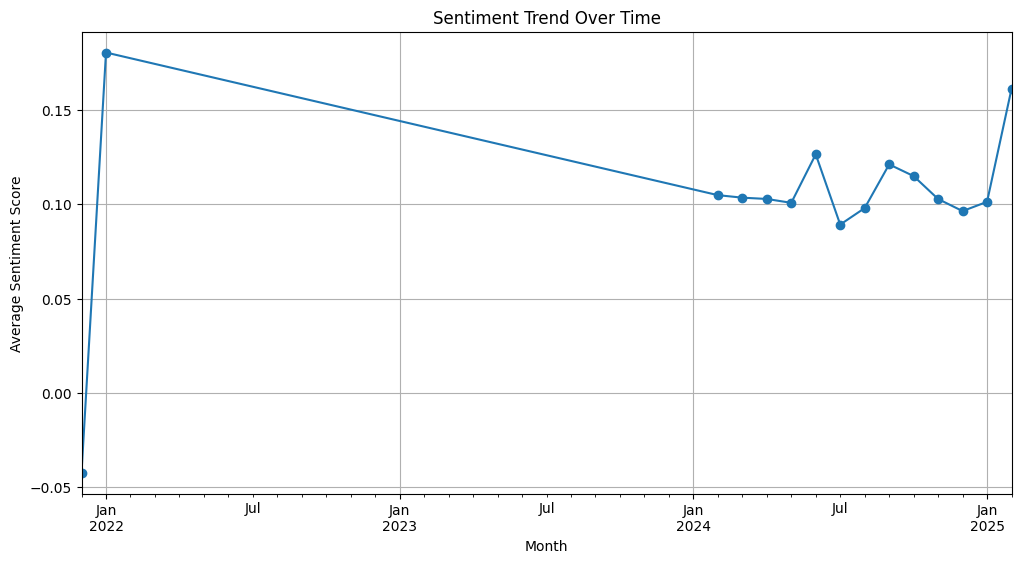

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Ensure "Date" is in datetime format
df["Date"] = pd.to_datetime(df["Date"])  # No need to convert from timestamp

# Compute sentiment score for each post
df["Sentiment"] = df["Clean_Text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)  # Ensure text is string

# Group by month
sentiment_trend = df.groupby(df["Date"].dt.to_period("M"))["Sentiment"].mean()

# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
sentiment_trend.plot(marker="o", linestyle="-")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.show()


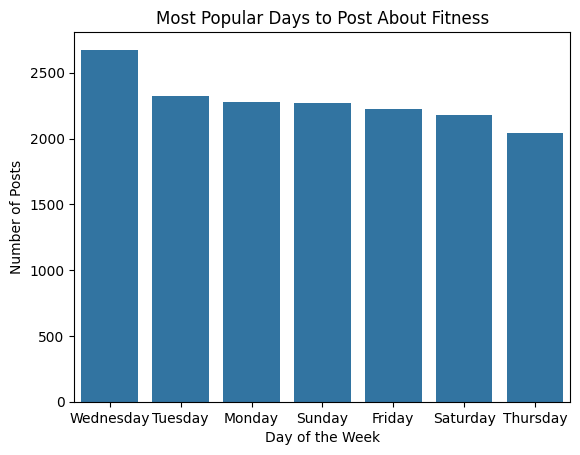

In [14]:
# Extract day of the week
df["Day_of_Week"] = df["Date"].dt.day_name()

# Count posts per day
day_counts = df["Day_of_Week"].value_counts()

# Plot
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title("Most Popular Days to Post About Fitness")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Posts")
plt.show()


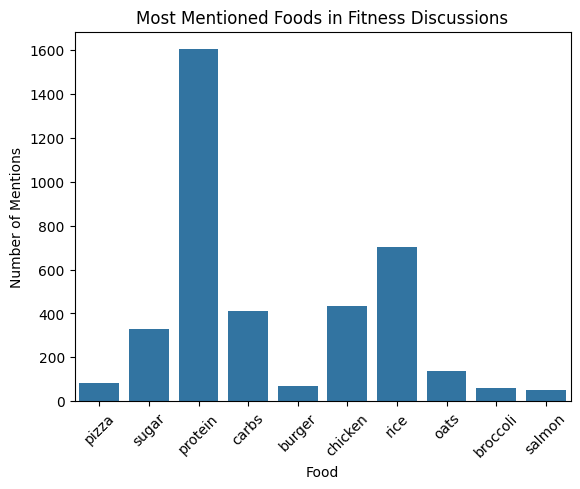

In [15]:
food_keywords = ["chicken", "salmon", "broccoli", "oats", "rice", "pizza", "burger", "sugar", "protein", "carbs"]
food_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for food in food_keywords:
        if food in post["Clean_Text"].lower():
            food_counts[food] += 1

sns.barplot(x=list(food_counts.keys()), y=list(food_counts.values()))
plt.title("Most Mentioned Foods in Fitness Discussions")
plt.xlabel("Food")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.show()


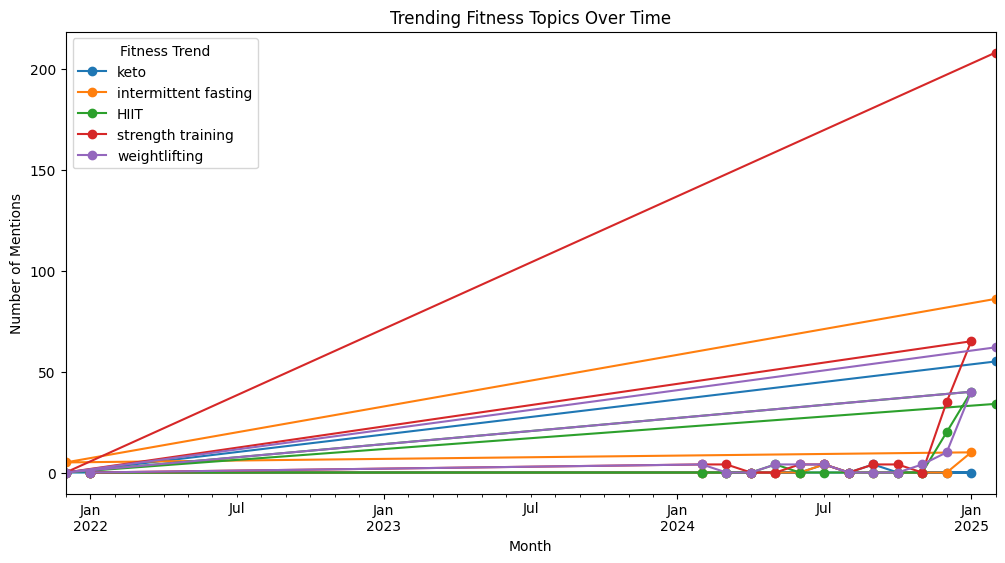

In [16]:
trend_keywords = ["keto", "intermittent fasting", "HIIT", "strength training", "weightlifting"]
trend_counts = {trend: [] for trend in trend_keywords}

# Group posts by month
df["Month"] = df["Date"].dt.to_period("M")

for month in df["Month"].unique():
    month_posts = df[df["Month"] == month]["Clean_Text"]
    for trend in trend_keywords:
        trend_counts[trend].append(month_posts.str.contains(trend, case=False).sum())

# Convert to DataFrame
trend_df = pd.DataFrame(trend_counts, index=df["Month"].unique())

# Plot
trend_df.plot(figsize=(12, 6), marker="o")
plt.title("Trending Fitness Topics Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Mentions")
plt.legend(title="Fitness Trend")
plt.show()


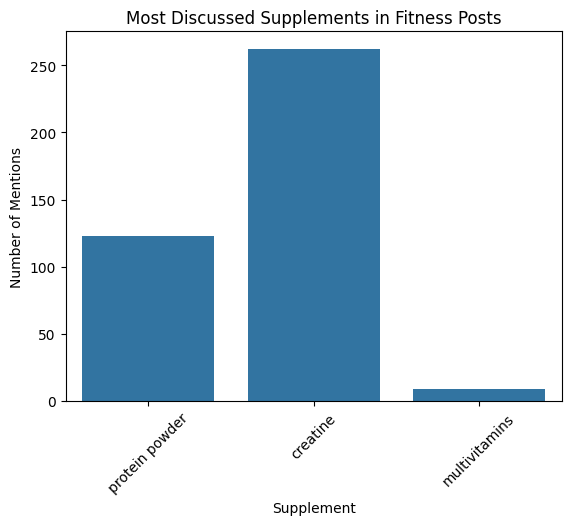

In [17]:
supplements = ["protein powder", "creatine", "BCAAs", "multivitamins", "fat burners", "pre-workout"]
supplement_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for supplement in supplements:
        if supplement in post["Clean_Text"].lower():
            supplement_counts[supplement] += 1

sns.barplot(x=list(supplement_counts.keys()), y=list(supplement_counts.values()))
plt.title("Most Discussed Supplements in Fitness Posts")
plt.xlabel("Supplement")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.show()


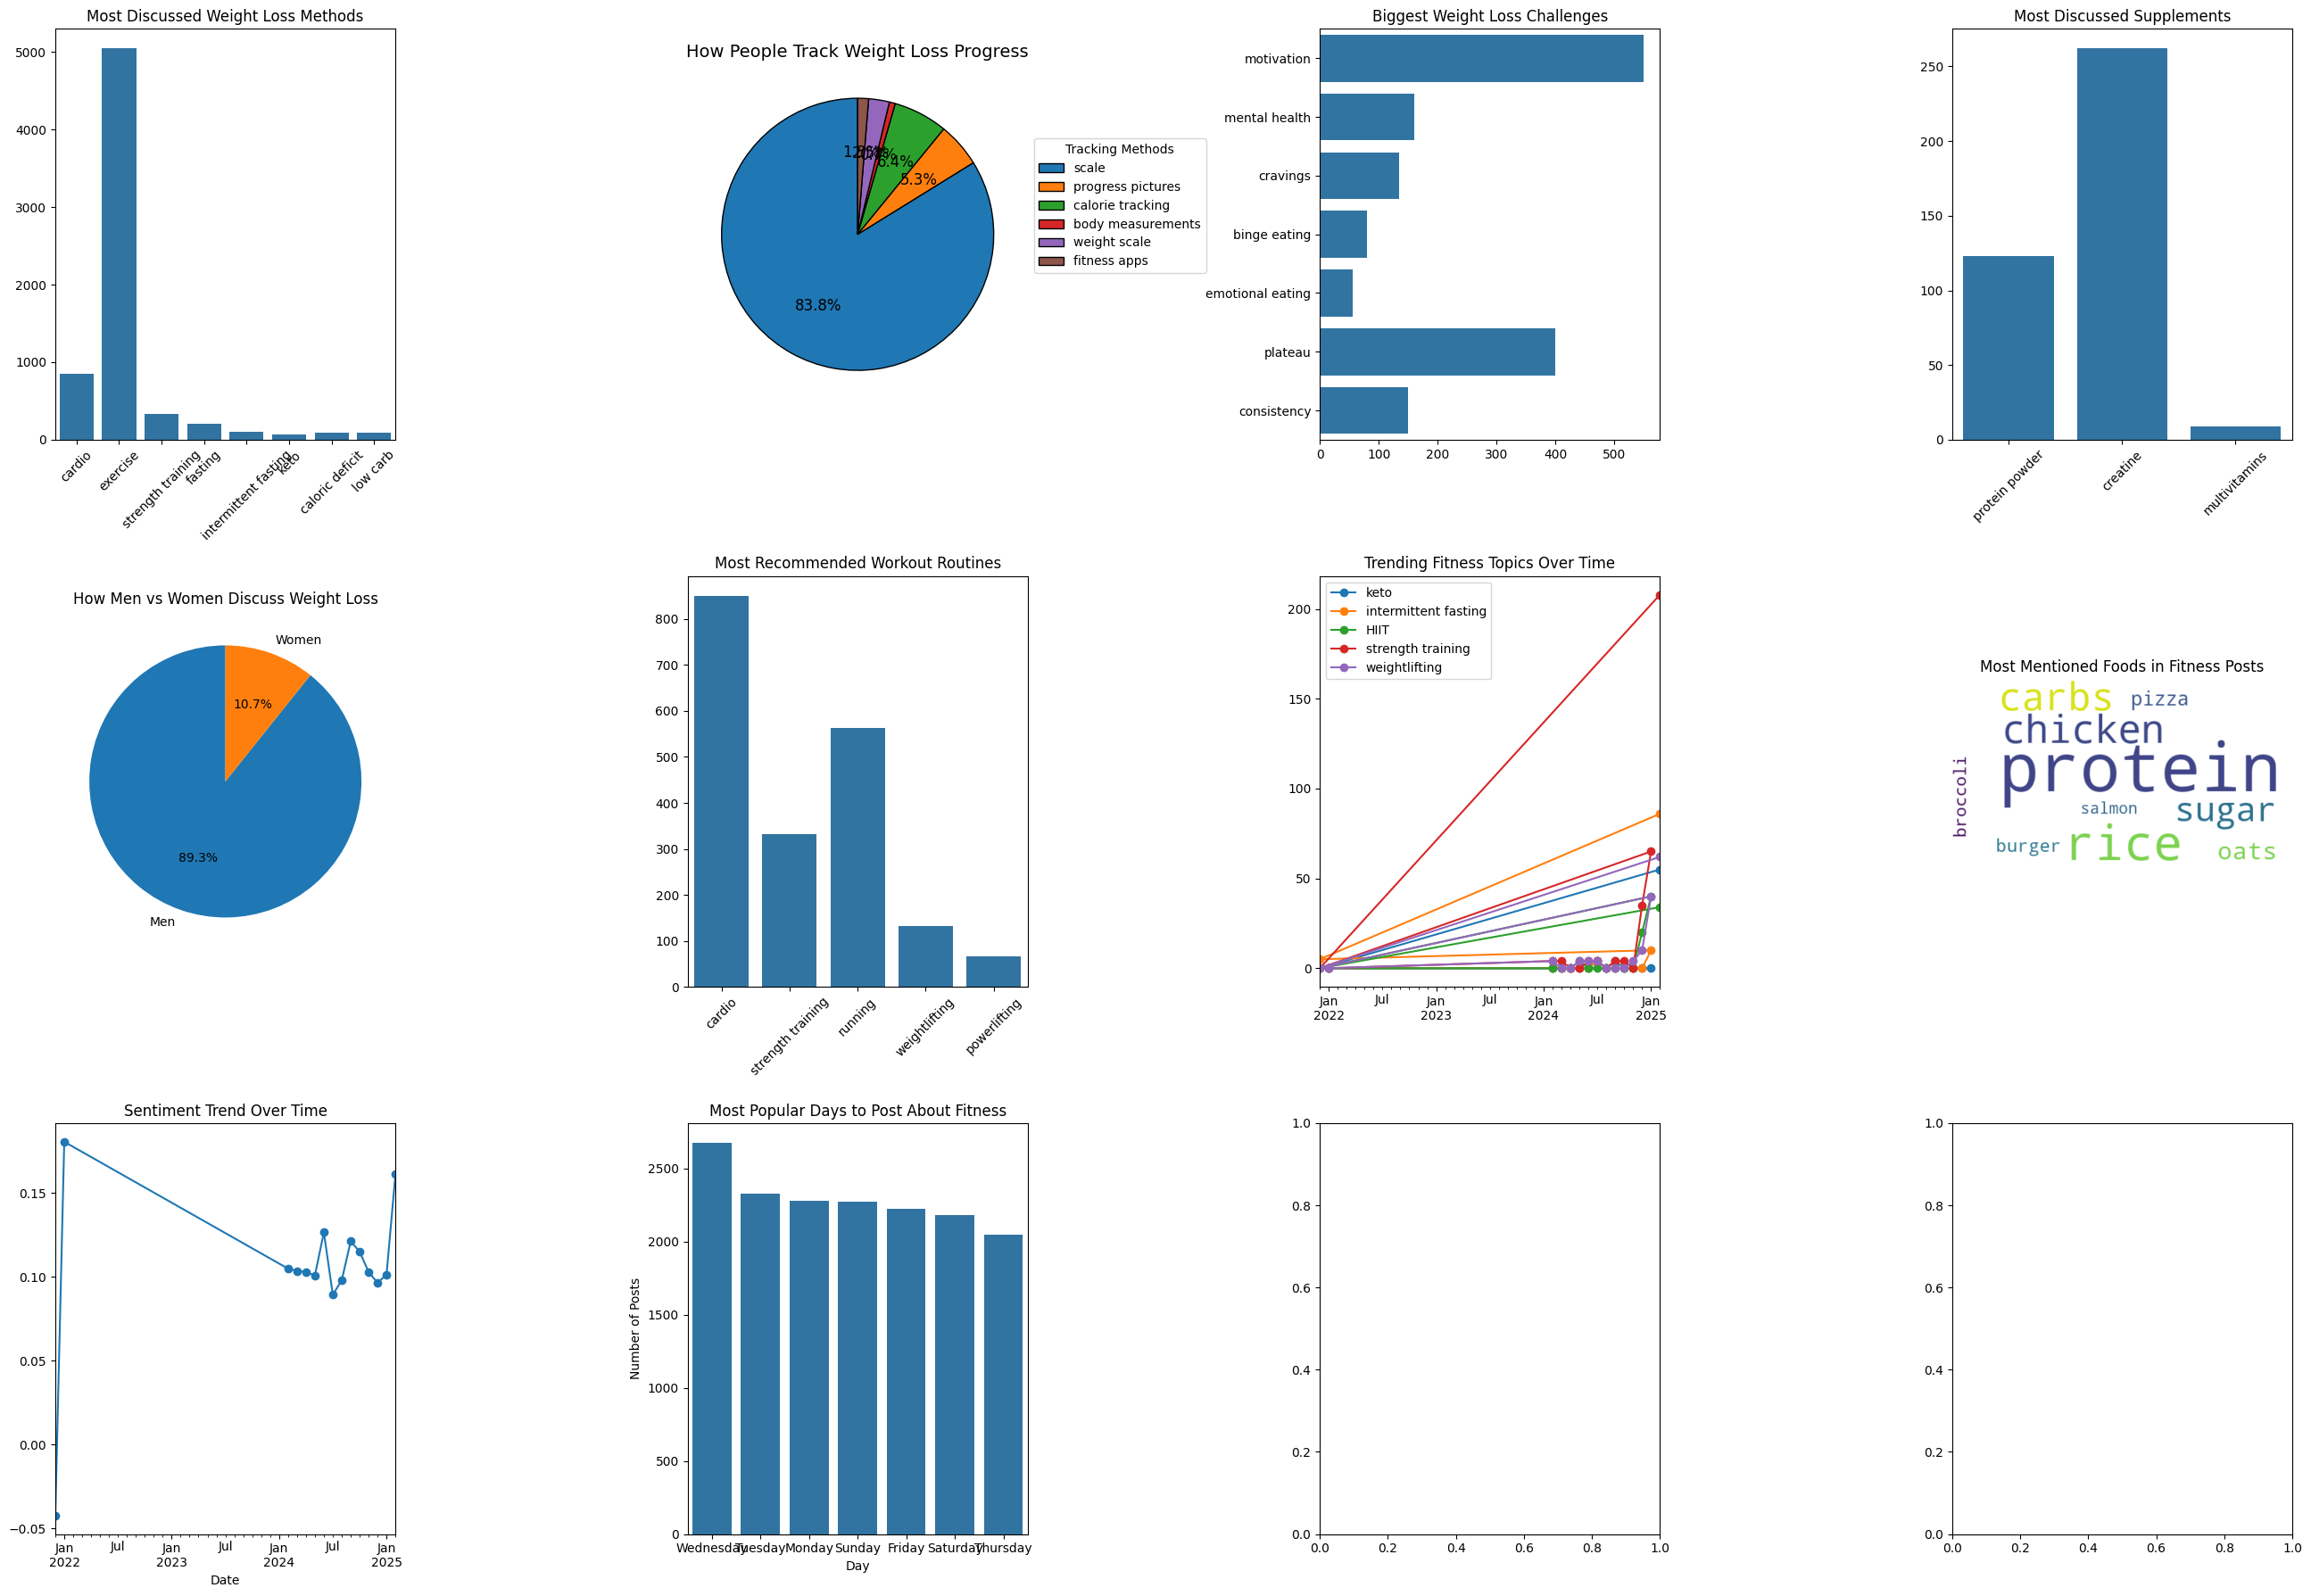

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from textblob import TextBlob
from wordcloud import WordCloud

# Create a grid layout for visualizing multiple analyses
fig, axes = plt.subplots(3, 4, figsize=(26, 18))

# ---------------------- 1. Most Discussed Weight Loss Methods (Bar Chart) ----------------------
weight_loss_methods = ["caloric deficit", "fasting", "keto", "low carb", "cardio", "exercise", "strength training", "intermittent fasting"]
method_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for method in weight_loss_methods:
        if method in post["Clean_Text"].lower():
            method_counts[method] += 1

sns.barplot(x=list(method_counts.keys()), y=list(method_counts.values()), ax=axes[0, 0])
axes[0, 0].set_title("Most Discussed Weight Loss Methods")
axes[0, 0].tick_params(axis='x', rotation=45)

# ---------------------- 2. How Users Track Progress (Pie Chart) ----------------------
tracking_methods = ["calorie tracking", "scale", "progress pictures", "fitness apps", "body measurements", "weight scale"]
tracking_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for method in tracking_methods:
        if method in post["Clean_Text"].lower():
            tracking_counts[method] += 1

wedges, texts, autotexts = axes[0, 1].pie(
    tracking_counts.values(), labels=None, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black'}
)
axes[0, 1].set_title("How People Track Weight Loss Progress", fontsize=14)
axes[0, 1].legend(wedges, tracking_counts.keys(), title="Tracking Methods", loc="upper left", bbox_to_anchor=(1, 0.8))

# ---------------------- 3. Biggest Struggles in Weight Loss (Horizontal Bar Chart) ----------------------
struggles = ["plateau", "motivation", "binge eating", "cravings", "emotional eating", "consistency", "mental health"]
struggle_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for struggle in struggles:
        if struggle in post["Clean_Text"].lower():
            struggle_counts[struggle] += 1

sns.barplot(x=list(struggle_counts.values()), y=list(struggle_counts.keys()), ax=axes[0, 2], orient="h")
axes[0, 2].set_title("Biggest Weight Loss Challenges")

# ---------------------- 4. Most Discussed Supplements (Bar Chart) ----------------------
supplements = ["protein powder", "creatine", "BCAAs", "multivitamins", "fat burners", "pre-workout"]
supplement_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for supplement in supplements:
        if supplement in post["Clean_Text"].lower():
            supplement_counts[supplement] += 1

sns.barplot(x=list(supplement_counts.keys()), y=list(supplement_counts.values()), ax=axes[0, 3])
axes[0, 3].set_title("Most Discussed Supplements")
axes[0, 3].tick_params(axis='x', rotation=45)

# ---------------------- 5. How Men vs Women Discuss Weight Loss (Pie Chart) ----------------------
men_keywords = ["25M", "30M", "man", "male"]
women_keywords = ["25F", "30F", "woman", "female"]

male_posts = collection.find({"Clean_Text": {"$regex": "|".join(men_keywords), "$options": "i"}})
female_posts = collection.find({"Clean_Text": {"$regex": "|".join(women_keywords), "$options": "i"}})

male_count = sum(1 for _ in male_posts)
female_count = sum(1 for _ in female_posts)

axes[1, 0].pie([male_count, female_count], labels=["Men", "Women"], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title("How Men vs Women Discuss Weight Loss")

# ---------------------- 6. Most Recommended Workout Routines (Bar Chart) ----------------------
workout_routines = ["strength training", "HIIT", "CrossFit", "running", "cardio", "weightlifting", "powerlifting"]
workout_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for routine in workout_routines:
        if routine in post["Clean_Text"].lower():
            workout_counts[routine] += 1

sns.barplot(x=list(workout_counts.keys()), y=list(workout_counts.values()), ax=axes[1, 1])
axes[1, 1].set_title("Most Recommended Workout Routines")
axes[1, 1].tick_params(axis='x', rotation=45)

# ---------------------- 7. Trending Fitness Topics Over Time (Line Chart) ----------------------
trend_keywords = ["keto", "intermittent fasting", "HIIT", "strength training", "weightlifting"]
trend_counts = {trend: [] for trend in trend_keywords}

df["Date"] = pd.to_datetime(df["Date"])  # No need to convert from timestamp
df["Month"] = df["Date"].dt.to_period("M")

for month in df["Month"].unique():
    month_posts = df[df["Month"] == month]["Clean_Text"]
    for trend in trend_keywords:
        trend_counts[trend].append(month_posts.str.contains(trend, case=False).sum())

trend_df = pd.DataFrame(trend_counts, index=df["Month"].unique())
trend_df.plot(ax=axes[1, 2], marker="o")
axes[1, 2].set_title("Trending Fitness Topics Over Time")

# ---------------------- 8. Most Mentioned Foods (Word Cloud) ----------------------
food_keywords = ["chicken", "salmon", "broccoli", "oats", "rice", "pizza", "burger", "sugar", "protein", "carbs"]
food_counts = Counter()

posts = collection.find({}, {"Clean_Text": 1})
for post in posts:
    for food in food_keywords:
        if food in post["Clean_Text"].lower():
            food_counts[food] += 1

wordcloud = WordCloud(width=500, height=300, background_color="white").generate_from_frequencies(food_counts)
axes[1, 3].imshow(wordcloud, interpolation="bilinear")
axes[1, 3].axis("off")
axes[1, 3].set_title("Most Mentioned Foods in Fitness Posts")

# ---------------------- 9. Sentiment Trend Over Time (Line Chart) ----------------------
df["Sentiment"] = df["Clean_Text"].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_trend = df.groupby(df["Date"].dt.to_period("M"))["Sentiment"].mean()

sentiment_trend.plot(ax=axes[2, 0], marker="o")
axes[2, 0].set_title("Sentiment Trend Over Time")

# ---------------------- 10. Most Popular Days to Post About Fitness (Heatmap) ----------------------
df["Day_of_Week"] = df["Date"].dt.day_name()
day_counts = df["Day_of_Week"].value_counts()

sns.barplot(x=day_counts.index, y=day_counts.values, ax=axes[2, 1])
axes[2, 1].set_title("Most Popular Days to Post About Fitness")
axes[2, 1].set_xlabel("Day")
axes[2, 1].set_ylabel("Number of Posts")

# Adjust layout
plt.tight_layout()
plt.show()
